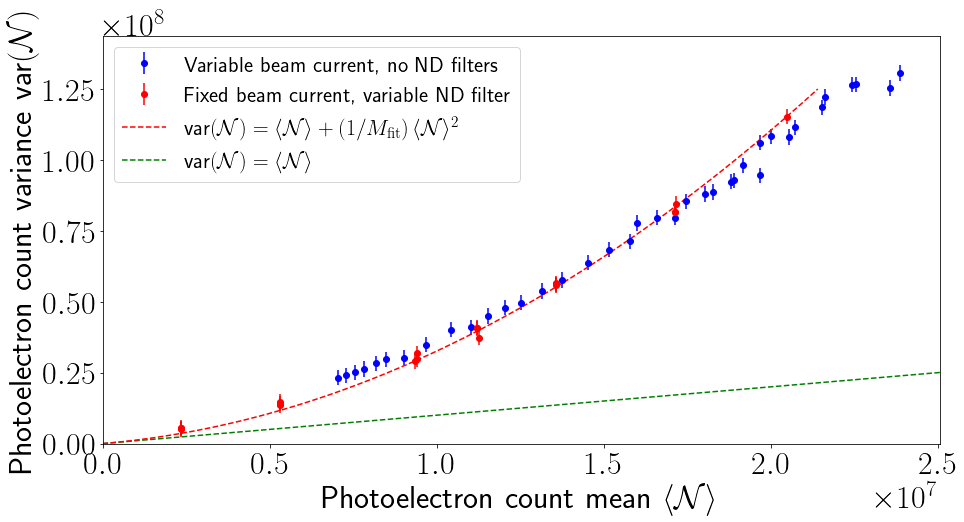

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from config import get_from_config
import fur.path_assistant as path_assistant
shift_03_16_2020 = path_assistant.PathAssistant('shift_03_16_2020')
shift_03_10_2020 = path_assistant.PathAssistant('shift_03_10_2020')
cur_to_sum_channel = get_from_config("Beam_current_to_Sum_channel_ampl_V/mA")
sum_channel_to_photoelectrons = get_from_config('sum_channel_to_photoelectrons')
N_to_I = 1/sum_channel_to_photoelectrons/cur_to_sum_channel
meas_FLAT = pd.read_csv(shift_03_16_2020.get_results_dir().fi('meas_FLAT_03_16_2020.csv'), index_col=0)
theor_FLAT = pd.read_csv(shift_03_16_2020.get_results_dir().fi('theor_FLAT_03_16_2020.csv'), index_col=0)
meas_FLAT_ND = pd.read_csv(shift_03_10_2020.get_results_dir().fi('meas_FLAT_ND_FILTERS_03_10_2020.csv'), index_col=0)
theor_FLAT_ND = pd.read_csv(shift_03_10_2020.get_results_dir().fi('theor_FLAT_ND_FILTERS_03_10_2020.csv'), index_col=0)

plt.rcParams["text.usetex"] =True
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')
plt.rcParams.update({'font.size': 32,'legend.fontsize':22})
colors = {"FLAT": 'blue'}

fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(meas_FLAT['N'],meas_FLAT['varN'],marker='o',linestyle='None',yerr=meas_FLAT['errorbar'],color='b',
            label = r'Variable beam current, no ND filters')
ax.plot(theor_FLAT['N'], theor_FLAT['N'],color='green',linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle$")

ax.set_ylabel(r"Photoelectron count variance var$\left(\mathcal{N}\right)$")
ax.set_xlabel(r"Photoelectron count mean $\langle\mathcal{N}\rangle$")

#nd filters
ax.errorbar(meas_FLAT_ND['N'], meas_FLAT_ND['varN'],marker='o',linestyle='None',yerr=meas_FLAT_ND['errorbar'],
            color='r', label = 'Fixed beam current, variable ND filter')
ax.plot(theor_FLAT_ND['N'], theor_FLAT_ND['varN_fit'],color='r', linestyle='--',
        label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{fit}}\right)\langle\mathcal{N}\rangle^2$")


handles, labels = ax.get_legend_handles_labels()
order = [2,3,1,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.set_xlim(0, 1.05*meas_FLAT['N'].max())
ax.set_ylim(0, 1.1*meas_FLAT['varN'].max())



plt.show()